In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("creditcard.csv")

y = df["Class"]
X = df.drop(["Class", "Amount", "Time"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [2]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [3]:
y_pred = model.predict(X_test)

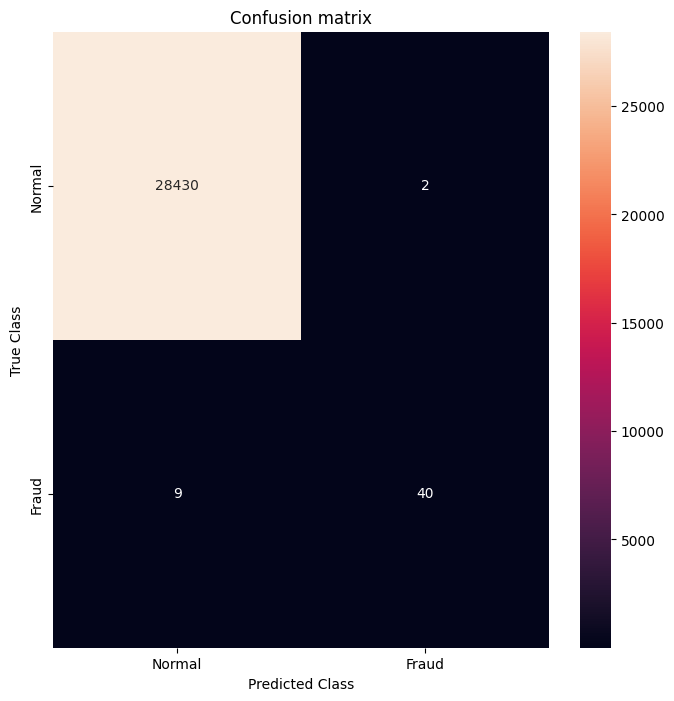

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ['Normal','Fraud']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

plt.title("Confusion matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

## Hyperparameter tuning

In [6]:
model = xgb.XGBClassifier(scale_pos_weight=100)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

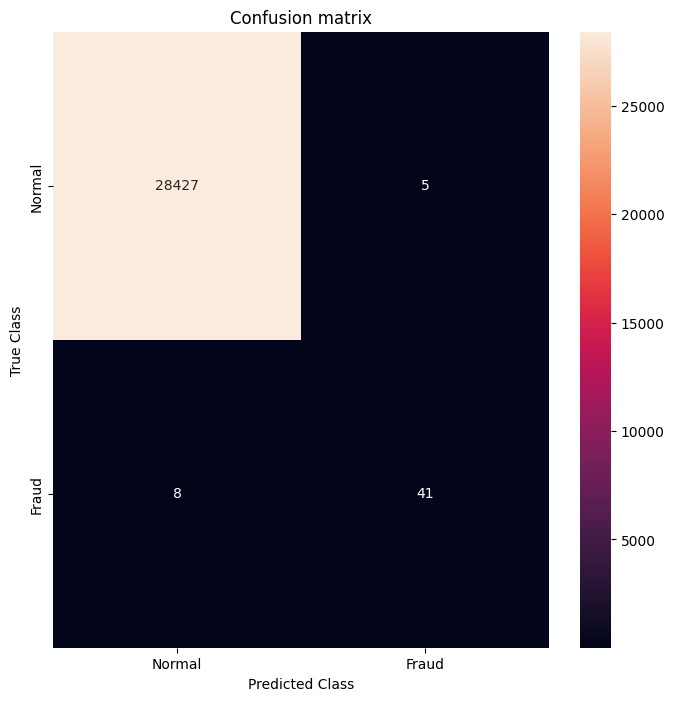

In [7]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

plt.title("Confusion matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

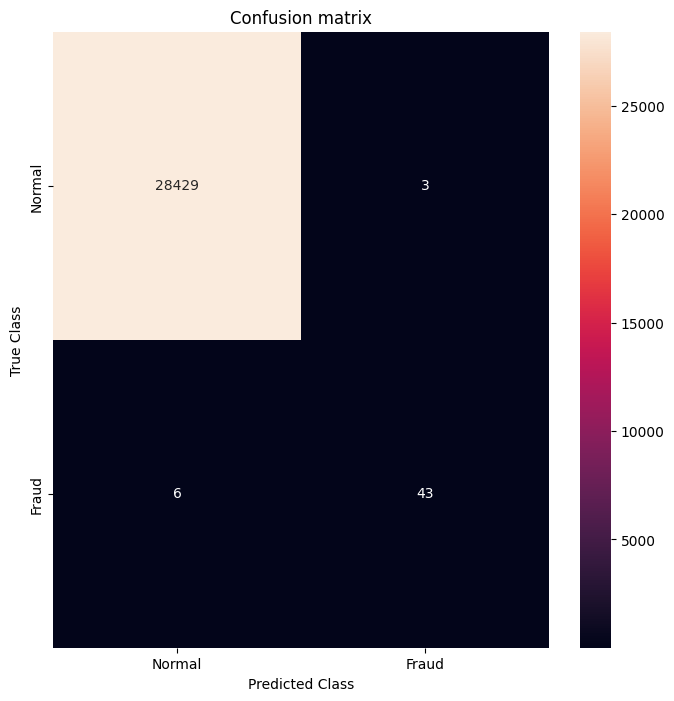

In [8]:
model = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

plt.title("Confusion matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

### Interpretation of the results

In [9]:
model.feature_importances_

array([0.01778892, 0.006522  , 0.01161652, 0.04864641, 0.00839465,
       0.01592866, 0.02007158, 0.02973094, 0.00941193, 0.04264095,
       0.01003185, 0.02240502, 0.01880649, 0.52212244, 0.01488954,
       0.00652269, 0.08942025, 0.00986922, 0.01701785, 0.01133021,
       0.01525105, 0.0066182 , 0.01258562, 0.00372731, 0.00570192,
       0.01185634, 0.00590739, 0.00518408], dtype=float32)

In [10]:
## Other metrics
from sklearn.metrics import (classification_report, precision_score, recall_score,
                            average_precision_score, roc_auc_score, f1_score, matthews_corrcoef)

In [11]:
precision_score(y_test, y_pred)

0.9347826086956522

In [12]:
recall_score(y_test, y_pred)

0.8775510204081632

In [13]:
f1_score(y_test, y_pred)

0.9052631578947369

In [14]:
roc_auc_score(y_test, y_pred)

0.9387227527476945

## Best metric for fraud detection (or highly imabalanced dataset)

In [16]:
# AUPRC: area under the precision-recall curve
# better alternative to AUC as it doesn't include TN which influences the scores significantly in highly imbalanced data 
average_precision_score(y_test, y_pred)

0.8205300988809707

In [17]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     28432\n           1       0.93      0.88      0.91        49\n\n    accuracy                           1.00     28481\n   macro avg       0.97      0.94      0.95     28481\nweighted avg       1.00      1.00      1.00     28481\n'